In [30]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
from random import shuffle

In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [41]:
from keras.utils import to_categorical
from keras.layers import Input,Dense,Conv2D,Flatten,MaxPool2D,ReLU,Softmax
from keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split

In [5]:
od.download('https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading cell-images-for-detecting-malaria.zip to .\cell-images-for-detecting-malaria


100%|██████████| 675M/675M [02:26<00:00, 4.82MB/s] 


In [4]:
dir = './cell-images-for-detecting-malaria/cell_images'
labels = os.listdir(dir)
print(labels)

['Parasitized', 'Uninfected']


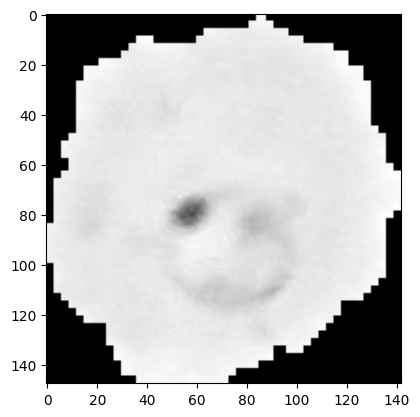

In [9]:
#visualize images

for label in labels:
    path = os.path.join(dir,label)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr,cmap='gray')
        break
    break


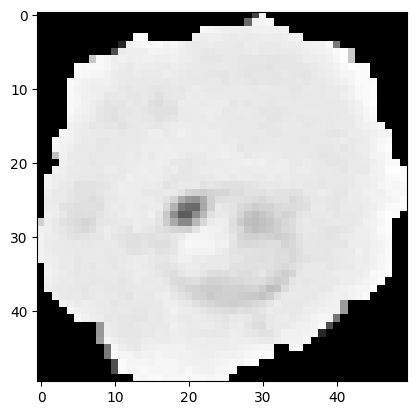

In [16]:
# Testing the  clarity
img_size = 50
temp = cv2.resize(img_arr,(img_size,img_size))
plt.imshow(temp,cmap='gray')
plt.show()

In [21]:
for label in labels:
    print("The class label for {} is {}".format(label,labels.index(label)))

The class label for Parasitized is 0
The class label for Uninfected is 1


In [23]:
dataset = []
def ds_gen():
    for label in labels:
        path = os.path.join(dir,label)
        class_idx = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_img_arr = cv2.resize(img_arr,(64,64))
                dataset.append([new_img_arr,class_idx])
            except Exception as e:
                pass

ds_gen()


In [ ]:
shuffle(dataset)

# for sample in dataset:
#     print(sample[1])

In [36]:
df= pd.DataFrame(dataset,columns=['features','labels'])

In [39]:
train_val_df, test_df = train_test_split(df,train_size=0.75,stratify=df['labels'])
train_df,val_df = train_test_split(train_val_df,train_size=0.85,stratify=train_val_df['labels'])

In [ ]:
input_layer = Input(shape=(64,64))

x = Conv2D(filters=32,
           kernel_size=3)